**ML Project Start**

**Team Blue Clusters**


# Importing data for coins

In [ ]:
# Adri and I are attempting to analyze Elon Musk's tweets effect on coins 
# + general twitter 
# + trad econ macro events 

In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.4 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns

from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt

import random,os
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader, Subset
from collections import OrderedDict


from sklearn.preprocessing import MinMaxScaler 

In [ ]:
# Import Drive API and authenticate.
from google.colab import drive
# Mount your Drive to the Colab VM.
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
def build_df(path_to_parquet_file, array_with_our_choices): 

  # reading the big df with all assets
  all_assets = pd.DataFrame()
  all_assets = pd.read_parquet(path_to_parquet_file) 
  
  # resetting index and cleaning column names from bull shit 
  all_assets.reset_index(inplace=True) 
  all_assets.columns = [c.split('.')[-1].replace('_','') for c in all_assets.columns]

  # array with all unqiue symbols from MAIN FILE  
  all_symbols = all_assets["symbol"].unique() 

  # list to store our small dataframes with our chosen assets 
  list_of_df = list()  

# just in case, this is very important --> below is for loop haha 

  for symbol in array_with_our_choices:

    # temp df for slicing main big df
    temp_df = pd.DataFrame() 
    temp_df = all_assets.loc[all_assets['symbol'] == symbol] 

    # small df for processing stuff and storing in our list_of_df 
    small_df = pd.DataFrame() 
    small_df = temp_df[['timeclose', 'close', 'marketcap', 'volume']] 
    small_df = small_df.set_index(['timeclose']) 

    # inserting column for "returns"  
    small_df.insert(1, 'returns', small_df['close'].pct_change()) 
    small_df = small_df.rename(columns={'close' : 'price'}) 

    # renaming columns based on the symbol that we are looping at 
    small_df.columns = [c.replace(c, symbol+'_'+c) for c in small_df.columns]

    # pasting to our list 
    list_of_df.append(small_df) 

  # final dataframe with beatufilly structured chosen assets 
  final_df = pd.DataFrame() 

  # looping thru our chosen assets in our list 
  for df in list_of_df: 
    final_df = final_df.join(df, how='outer')  

  return final_df 

In [ ]:
def build(path_to_parquet_file, array_with_our_choices): 

  # reading the big df with all assets
  all_assets = pd.DataFrame()
  all_assets = pd.read_parquet(path_to_parquet_file) 
  
  # resetting index and cleaning column names from bull shit 
  all_assets.reset_index(inplace=True) 
  all_assets.columns = [c.split('.')[-1].replace('_','') for c in all_assets.columns]

  # array with all unqiue symbols from MAIN FILE  
  all_symbols = all_assets["symbol"].unique() 

  # list to store our small dataframes with our chosen assets 
  list_of_df = list()  

# just in case, this is very important --> below is for loop haha 

  for symbol in array_with_our_choices:

    # temp df for slicing main big df
    temp_df = pd.DataFrame() 
    temp_df = all_assets.loc[all_assets['symbol'] == symbol] 

    # small df for processing stuff and storing in our list_of_df 
    small_df = pd.DataFrame() 
    small_df = temp_df[['timeclose', 'close', 'marketcap', 'volume']] 
    small_df = small_df.set_index(['timeclose']) 

    # inserting column for "returns"  
    # small_df.insert(1, 'returns', small_df['close'].pct_change()) 
    small_df = small_df.rename(columns={'close' : 'price'}) 

    # renaming columns based on the symbol that we are looping at 
    small_df.columns = [c.replace(c, symbol+'_'+c) for c in small_df.columns]

    # pasting to our list 
    list_of_df.append(small_df) 

  # final dataframe with beatufilly structured chosen assets 
  final_df = pd.DataFrame() 

  # looping thru our chosen assets in our list 
  for df in list_of_df: 
    final_df = final_df.join(df, how='outer')  

  return final_df 

In [ ]:
# def build_2(path_to_parquet_file, array_with_our_choices): 

#   # reading the big df with all assets
#   all_assets = pd.DataFrame()
#   all_assets = pd.read_parquet(path_to_parquet_file) 
  
#   # resetting index and cleaning column names from bull shit 
#   all_assets.reset_index(inplace=True) 
#   all_assets.columns = [c.split('.')[-1].replace('_','') for c in all_assets.columns]

#   # array with all unqiue symbols from MAIN FILE  
#   all_symbols = all_assets["symbol"].unique() 

#   # list to store our small dataframes with our chosen assets 
#   list_of_df = list()  

# # just in case, this is very important --> below is for loop haha 

#   for symbol in array_with_our_choices:

#     # temp df for slicing main big df
#     temp_df = pd.DataFrame() 
#     temp_df = all_assets.loc[all_assets['symbol'] == symbol] 

#     # small df for processing stuff and storing in our list_of_df 
#     small_df = pd.DataFrame() 
#     small_df = temp_df[['timeclose', 'close', 'marketcap']] 
#     small_df = small_df.set_index(['timeclose']) 

#     # inserting column for "returns"  
#     # small_df.insert(1, 'returns', small_df['close'].pct_change()) 
#     small_df = small_df.rename(columns={'close' : 'price'}) 
#     small_df = small_df.rename(columns={'market_cap' : 'marketcap'}) 


#     # renaming columns based on the symbol that we are looping at 
#     small_df.columns = [c.replace(c, symbol+'_'+c) for c in small_df.columns]
#     small_df.reset_index(inplace=True)
#     # pasting to our list 
#     list_of_df.append(small_df) 

#   # final dataframe with beatufilly structured chosen assets 
#   final_df = list_of_df[0].copy() 

#   # looping thru our chosen assets in our list 
#   for df in list_of_df[1:]: 
#     final_df = final_df.merge(df, on='timeclose')  

#   return final_df 

In [ ]:
# path to our stored hourly parquet file and list of our 4 coins 
path_to_file = '/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/hourly.parquet.gzip' 
our_choices = ['ZIL', 'WBTC', 'XRP', 'LINK', 'ADA', 'EGLD', 'KAVA', 'BTC', 'TWT',
       'FLOW', 'BTT', 'HNT', 'ATOM', 'PAXG', 'LRC']  






# ['ETH',]  

In [ ]:
Nils_df = pd.DataFrame()
Nils_df = build(path_to_file, our_choices)
# Nils_df.to_parquet('/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/Nils_df.parquet') 

In [ ]:
Nils_df


,ZIL_price,ZIL_marketcap,ZIL_volume,WBTC_price,WBTC_marketcap,WBTC_volume,XRP_price,XRP_marketcap,XRP_volume,LINK_price,...,HNT_volume,ATOM_price,ATOM_marketcap,ATOM_volume,PAXG_price,PAXG_marketcap,PAXG_volume,LRC_price,LRC_marketcap,LRC_volume
timeclose,,,,,,,,,,,,,,,,,,,,,
2019-01-01T20:59:59.999Z,0.020133,1.878770e+08,NaN,NaN,NaN,NaN,0.361382,1.474226e+10,NaN,0.297366,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040866,3.224299e+07,NaN
2019-01-01T21:59:59.999Z,0.020208,1.885781e+08,NaN,NaN,NaN,NaN,0.359394,1.466118e+10,NaN,0.295961,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040695,3.210741e+07,NaN
2019-01-01T22:59:59.999Z,0.020236,1.888430e+08,NaN,NaN,NaN,NaN,0.359935,1.468323e+10,NaN,0.296336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040802,3.219209e+07,NaN
2019-01-01T23:59:59.999Z,0.020717,1.933268e+08,NaN,NaN,NaN,NaN,0.364771,1.488050e+10,NaN,0.299371,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.042122,3.323374e+07,NaN
2019-01-02T00:59:59.999Z,0.020528,1.915641e+08,NaN,NaN,NaN,NaN,0.363369,1.482333e+10,NaN,0.298286,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.045095,3.557893e+07,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10T22:59:59.999Z,0.031145,4.172129e+08,43227402.82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19127372.04,NaN,NaN,NaN,1661.649047,5.403840e+08,9231008.01,0.276163,3.673335e+08,31198035.05
2022-10-10T23:59:59.999Z,0.031013,4.154455e+08,43664938.45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,19462745.97,NaN,NaN,NaN,1662.497659,5.406600e+08,9118547.02,0.275255,3.661262e+08,31206433.27
2022-10-11T00:59:59.999Z,0.030399,4.072207e+08,51594073.71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.270582,3.599099e+08,35320156.72


In [ ]:
our_choices2 = ['QNT', 'AAVE', 'VET', 'COMP', 'SAND', 'LUNC', 'USDP', 'WAVES', 'LEO', 'FIL', 'UNI',
        'ETH', 'SHIB', 'DASH', 'XLM'] 

In [ ]:
Nils_df2 = pd.DataFrame()
Nils_df2 = build_2(path_to_file, our_choices2) 
Nils_df2.to_parquet('/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/Nils_df2.parquet') 

In [ ]:
our_choices3 = ['FEI', 'ICP', 'BNB', 'ALGO', 'LTC', 'STX', 'HBAR', 'XEM', 'TUSD', 'USDC', '1INCH', 'TON', 'MIOTA', 'MKR', 'XEC' 'DOGE'] 

In [ ]:
Nils_df3 = pd.DataFrame() 
Nils_df3 = build_2(path_to_file, our_choices3) 
Nils_df3.to_parquet('/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/Nils_df3.parquet') 

In [ ]:
our_choices4= ['CELO', 'MINA', 'BUSD', 'GMT', 'SOL', 'USDN', 'TRX', 'KLAY', 'NEO', 'ETC', 'XTZ', 'KCS', 'MANA', 'RUNE', 'ENJ', 'FTM', 'SHIB', 'BTC'] 


In [ ]:
Nils_df4 = pd.DataFrame() 
Nils_df4 = build_2(path_to_file, our_choices4) 
Nils_df4.to_parquet('/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/Nils_df4.parquet') 

In [ ]:
Nils_df4

,CELO_price,CELO_marketcap,MINA_price,MINA_marketcap,BUSD_price,BUSD_marketcap,GMT_price,GMT_marketcap,SOL_price,SOL_marketcap,...,RUNE_price,RUNE_marketcap,ENJ_price,ENJ_marketcap,FTM_price,FTM_marketcap,SHIB_price,SHIB_marketcap,BTC_price,BTC_marketcap
timeclose,,,,,,,,,,,,,,,,,,,,,
2019-01-01T20:59:59.999Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.039407,2.999464e+07,0.006701,8.509691e+06,NaN,NaN,3773.474813,6.587482e+10
2019-01-01T21:59:59.999Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.039319,2.992820e+07,0.006772,8.600109e+06,NaN,NaN,3764.366076,6.571614e+10
2019-01-01T22:59:59.999Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.039610,3.014956e+07,0.006750,8.572177e+06,NaN,NaN,3766.928461,6.576110e+10
2019-01-01T23:59:59.999Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.040699,3.097809e+07,0.006609,8.393360e+06,NaN,NaN,3843.519967,6.709863e+10
2019-01-02T00:59:59.999Z,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0.040851,3.109411e+07,0.006583,8.360058e+06,NaN,NaN,3836.131040,6.696983e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-10T23:59:59.999Z,0.766700,3.587521e+08,0.572536,4.026401e+08,NaN,NaN,0.644694,3.868166e+08,NaN,NaN,...,1.523967,5.039575e+08,0.435909,4.359087e+08,0.208516,5.306750e+08,NaN,NaN,NaN,NaN
2022-10-11T00:59:59.999Z,0.753599,3.526218e+08,0.563962,3.966544e+08,NaN,NaN,0.631422,3.788532e+08,NaN,NaN,...,NaN,NaN,0.428468,4.284677e+08,NaN,NaN,NaN,NaN,NaN,NaN
2022-10-11T01:59:59.999Z,0.749762,3.508265e+08,0.556974,3.917396e+08,NaN,NaN,0.628535,3.771208e+08,NaN,NaN,...,NaN,NaN,0.426683,4.266826e+08,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
365*3.75*24

32850.0

In [ ]:
test = pd.read_parquet('/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/hourly.parquet.gzip')
test.reset_index(inplace=True)
test.columns = [c.split('.')[-1].replace('_','') for c in test.columns]
test 

,symbolid,timeclose,timeopen,timehigh,timelow,open,high,low,close,marketcap,volume,timestamp,symbol,id
0,ZIL_2469,2019-01-01T20:59:59.999Z,2019-01-01T20:00:00.000Z,2019-01-01T20:52:19.000Z,2019-01-01T20:00:15.000Z,0.019861,0.020177,0.019861,0.020133,1.878770e+08,NaN,2019-01-01T20:59:59.999Z,ZIL,2469
1,ZIL_2469,2019-01-01T21:59:59.999Z,2019-01-01T21:00:00.000Z,2019-01-01T21:17:18.000Z,2019-01-01T21:01:21.000Z,0.020221,0.020316,0.020152,0.020208,1.885781e+08,NaN,2019-01-01T21:59:59.999Z,ZIL,2469
2,ZIL_2469,2019-01-01T22:59:59.999Z,2019-01-01T22:00:00.000Z,2019-01-01T22:45:18.000Z,2019-01-01T22:23:19.000Z,0.020231,0.020285,0.020080,0.020236,1.888430e+08,NaN,2019-01-01T22:59:59.999Z,ZIL,2469
3,ZIL_2469,2019-01-01T23:59:59.999Z,2019-01-01T23:00:00.000Z,2019-01-01T23:31:17.000Z,2019-01-01T23:00:16.000Z,0.020278,0.020830,0.020269,0.020717,1.933268e+08,NaN,2019-01-01T23:59:59.999Z,ZIL,2469
4,ZIL_2469,2019-01-02T00:59:59.999Z,2019-01-02T00:00:00.000Z,2019-01-02T00:04:21.000Z,2019-01-02T00:45:17.000Z,0.020800,0.020800,0.020442,0.020528,1.915641e+08,NaN,2019-01-02T00:59:59.999Z,ZIL,2469
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2470955,HOT_2682,2022-10-10T22:59:59.999Z,2022-10-10T22:00:00.000Z,2022-10-10T22:02:00.000Z,2022-10-10T22:21:00.000Z,0.002060,0.002062,0.002044,0.002050,3.554313e+08,38684266.15,2022-10-10T22:59:59.999Z,HOT,2682
2470956,HOT_2682,2022-10-10T23:59:59.999Z,2022-10-10T23:00:00.000Z,2022-10-10T23:59:00.000Z,2022-10-10T23:47:00.000Z,0.002051,0.002062,0.002048,0.002062,3.573936e+08,39838329.01,2022-10-10T23:59:59.999Z,HOT,2682
2470957,HOT_2682,2022-10-11T00:59:59.999Z,2022-10-11T00:00:00.000Z,2022-10-11T00:56:00.000Z,2022-10-11T00:27:00.000Z,0.002062,0.002068,0.002042,0.002063,3.575700e+08,41787192.54,2022-10-11T00:59:59.999Z,HOT,2682
2470958,HOT_2682,2022-10-11T01:59:59.999Z,2022-10-11T01:00:00.000Z,2022-10-11T01:00:00.000Z,2022-10-11T01:43:00.000Z,0.002062,0.002062,0.002044,0.002050,3.553825e+08,41942123.71,2022-10-11T01:59:59.999Z,HOT,2682


In [ ]:
small = test[['timeclose', 'close', 'marketcap', 'symbol']] 
small.set_index('timeclose', inplace=True)
small.reset_index(inplace=True) 
small 

,timeclose,close,marketcap,symbol
0,2019-01-01T20:59:59.999Z,0.020133,1.878770e+08,ZIL
1,2019-01-01T21:59:59.999Z,0.020208,1.885781e+08,ZIL
2,2019-01-01T22:59:59.999Z,0.020236,1.888430e+08,ZIL
3,2019-01-01T23:59:59.999Z,0.020717,1.933268e+08,ZIL
4,2019-01-02T00:59:59.999Z,0.020528,1.915641e+08,ZIL
...,...,...,...,...
2470955,2022-10-10T22:59:59.999Z,0.002050,3.554313e+08,HOT
2470956,2022-10-10T23:59:59.999Z,0.002062,3.573936e+08,HOT
2470957,2022-10-11T00:59:59.999Z,0.002063,3.575700e+08,HOT
2470958,2022-10-11T01:59:59.999Z,0.002050,3.553825e+08,HOT


In [ ]:
all_symbols = small["symbol"].unique() 
all_symbols


array(['ZIL', 'WBTC', 'XRP', 'LINK', 'ADA', 'EGLD', 'KAVA', 'BTC', 'TWT',
       'FLOW', 'BTT', 'HNT', 'ATOM', 'PAXG', 'LRC', 'QNT', 'AAVE', 'VET',
       'COMP', 'SAND', 'LUNC', 'USDP', 'WAVES', 'LEO', 'FIL', 'UNI',
       'ETH', 'SHIB', 'DASH', 'XLM', 'FEI', 'ICP', 'BNB', 'ALGO', 'LTC',
       'STX', 'HBAR', 'XEM', 'TUSD', 'USDC', '1INCH', 'TON', 'MIOTA',
       'MKR', 'XEC', 'CELO', 'MINA', 'BUSD', 'GMT', 'SOL', 'USDN', 'TRX',
       'KLAY', 'NEO', 'ETC', 'XTZ', 'KCS', 'MANA', 'RUNE', 'ENJ', 'FTM',
       'DAI', 'SNX', 'DOGE', 'AVAX', 'USTC', 'FTT', 'THETA', 'USDT',
       'BCH', 'APE', 'HT', 'EOS', 'CSPR', 'NEAR', 'XMR', 'ZEC', 'DCR',
       'CAKE', 'BSV', 'RVN', 'KSM', 'BAT', 'GT', 'USDD', 'OKB', 'MATIC',
       'CVX', 'XDC', 'ENS', 'AXS', 'CRV', 'BTG', 'CHZ', 'CRO', 'DOT',
       'NEXO', 'LDO', 'GRT', 'HOT'], dtype=object)

In [ ]:
all_symbols[0:10]

array(['ZIL', 'WBTC', 'XRP', 'LINK', 'ADA', 'EGLD', 'KAVA', 'BTC', 'TWT',
       'FLOW'], dtype=object)

In [ ]:
first = pd.DataFrame()
first = small.loc[small['symbol'] == all_symbols[0]] 
first.set_index('timeclose', inplace=True)
first.drop(columns=['symbol'], inplace=True)
first.columns = [c.replace(c, all_symbols[0]+'_'+c) for c in first.columns]
first  

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,ZIL_close,ZIL_marketcap
timeclose,,
2019-01-01T20:59:59.999Z,0.020133,1.878770e+08
2019-01-01T21:59:59.999Z,0.020208,1.885781e+08
2019-01-01T22:59:59.999Z,0.020236,1.888430e+08
2019-01-01T23:59:59.999Z,0.020717,1.933268e+08
2019-01-02T00:59:59.999Z,0.020528,1.915641e+08
...,...,...
2022-10-10T22:59:59.999Z,0.031145,4.172129e+08
2022-10-10T23:59:59.999Z,0.031013,4.154455e+08
2022-10-11T00:59:59.999Z,0.030399,4.072207e+08


In [ ]:
all_symbols[1:].shape

(99,)

In [ ]:
rng = range(1, 100)
for i in rng: 
  tempdf = pd.DataFrame()
  tempdf = small.loc[small['symbol'] == all_symbols[i]] 
  tempdf.set_index('timeclose', inplace=True)
  tempdf.drop(columns=['symbol'], inplace=True)
  tempdf.columns = [c.replace(c, all_symbols[i]+'_'+c) for c in tempdf.columns]
  first = first.merge(tempdf, on='timeclose') 



/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
two = small.loc[small['symbol'] == 'DOGE']
two.set_index('timeclose', inplace=True) 
two.columns = [c.replace(c, 'DOGE'+'_'+c) for c in two.columns]

two 

,DOGE_close,DOGE_marketcap,DOGE_symbol
timeclose,,,
2019-01-01T20:59:59.999Z,0.002366,2.784099e+08,DOGE
2019-01-01T21:59:59.999Z,0.002352,2.766969e+08,DOGE
2019-01-01T22:59:59.999Z,0.002366,2.783406e+08,DOGE
2019-01-01T23:59:59.999Z,0.002392,2.814427e+08,DOGE
2019-01-02T00:59:59.999Z,0.002382,2.802788e+08,DOGE
...,...,...,...
2022-10-10T15:59:59.999Z,0.060734,8.057605e+09,DOGE
2022-10-10T16:59:59.999Z,0.060312,8.001651e+09,DOGE
2022-10-10T17:59:59.999Z,0.060716,8.055243e+09,DOGE


In [ ]:
# doge = doge.merge(tw_pol, on='Date') 
# onetwo = one.copy()
onetwo = pd.DataFrame()
onetwo = one.copy()
# onetwo = onetwo.merge(one, on='timeclose')
onetwo = onetwo.merge(two, on='timeclose')
onetwo 

,ETH_close,ETH_marketcap,ETH_symbol,DOGE_close,DOGE_marketcap,DOGE_symbol
timeclose,,,,,,
2019-01-01T20:59:59.999Z,140.346549,1.461575e+10,ETH,0.002366,2.784099e+08,DOGE
2019-01-01T21:59:59.999Z,139.695956,1.454810e+10,ETH,0.002352,2.766969e+08,DOGE
2019-01-01T22:59:59.999Z,139.968871,1.457664e+10,ETH,0.002366,2.783406e+08,DOGE
2019-01-01T23:59:59.999Z,140.819413,1.466532e+10,ETH,0.002392,2.814427e+08,DOGE
2019-01-02T00:59:59.999Z,141.995471,1.478792e+10,ETH,0.002382,2.802788e+08,DOGE
...,...,...,...,...,...,...
2022-10-10T15:59:59.999Z,1309.793999,1.607582e+11,ETH,0.060734,8.057605e+09,DOGE
2022-10-10T16:59:59.999Z,1302.063136,1.598109e+11,ETH,0.060312,8.001651e+09,DOGE
2022-10-10T17:59:59.999Z,1312.236572,1.610596e+11,ETH,0.060716,8.055243e+09,DOGE


In [ ]:
test.loc[test['symbol'] == 'ETH'] 

time_open  \
symbol_id time_close                                           
ETH_1027  2019-01-01T20:59:59.999Z  2019-01-01T20:00:00.000Z   
          2019-01-01T21:59:59.999Z  2019-01-01T21:00:00.000Z   
          2019-01-01T22:59:59.999Z  2019-01-01T22:00:00.000Z   
          2019-01-01T23:59:59.999Z  2019-01-01T23:00:00.000Z   
          2019-01-02T00:59:59.999Z  2019-01-02T00:00:00.000Z   
...                                                      ...   
          2022-10-10T15:59:59.999Z  2022-10-10T15:00:00.000Z   
          2022-10-10T16:59:59.999Z  2022-10-10T16:00:00.000Z   
          2022-10-10T17:59:59.999Z  2022-10-10T17:00:00.000Z   
          2022-10-10T18:59:59.999Z  2022-10-10T18:00:00.000Z   
          2022-10-10T19:59:59.999Z  2022-10-10T19:00:00.000Z   

                                                   time_high  \
symbol_id time_close                                           
ETH_1027  2019-01-01T20:59:59.999Z  2019-01-01T20:19:06.000Z   
          2019-01-01T21:59:59.999Z  2019-01-01T21:09:04.000Z   
          2019-01-01T22:59:59.999Z  2019-01-01T22:56:03.000Z   
          2019-01-01T23:59:59.999Z  2019-01-01T23:27:04.000Z   
          2019-01-02T00:59:59.999Z  2019-01-02T00:59:04.000Z   
...                                                      ...   
          2022-10-10T15:59:59.999Z  2022-10-10T15:25:00.000Z   
          2022-10-10T16:59:59.999Z  2022-10-10T16:00:00.000Z   
          2022-10-10T17:59:59.999Z  2022-10-10T17:56:00.000Z   
          2022-10-10T18:59:59.999Z  2022-10-10T18:01:00.000Z   
          2022-10-10T19:59:59.999Z  2022-10-10T19:22:00.000Z   

                                                    time_low  quote.USD.open  \
symbol_id time_close                                                           
ETH_1027  2019-01-01T20:59:59.999Z  2019-01-01T20:00:01.000Z      137.796657   
          2019-01-01T21:59:59.999Z  2019-01-01T21:56:03.000Z      140.858840   
          2019-01-01T22:59:59.999Z  2019-01-01T22:36:03.000Z      139.976084   
          2019-01-01T23:59:59.999Z  2019-01-01T23:07:03.000Z      139.985371   
          2019-01-02T00:59:59.999Z  2019-01-02T00:00:01.000Z      141.519517   
...                                                      ...             ...   
          2022-10-10T15:59:59.999Z  2022-10-10T15:00:00.000Z     1306.652414   
          2022-10-10T16:59:59.999Z  2022-10-10T16:59:00.000Z     1309.529406   
          2022-10-10T17:59:59.999Z  2022-10-10T17:10:00.000Z     1301.970487   
          2022-10-10T18:59:59.999Z  2022-10-10T18:59:00.000Z     1312.160648   
          2022-10-10T19:59:59.999Z  2022-10-10T19:13:00.000Z     1307.950998   

                                    quote.USD.high  quote.USD.low  \
symbol_id time_close                                                
ETH_1027  2019-01-01T20:59:59.999Z      140.781554     137.796657   
          2019-01-01T21:59:59.999Z      141.031075     139.695956   
          2019-01-01T22:59:59.999Z      139.976084     139.073323   
          2019-01-01T23:59:59.999Z      141.397504     139.658442   
          2019-01-02T00:59:59.999Z      141.995471     141.094583   
...                                            ...            ...   
          2022-10-10T15:59:59.999Z     1310.422695    1306.652414   
          2022-10-10T16:59:59.999Z     1309.529406    1302.063136   
          2022-10-10T17:59:59.999Z     1312.588289    1300.754840   
          2022-10-10T18:59:59.999Z     1312.161217    1307.703914   
          2022-10-10T19:59:59.999Z     1309.445280    1307.199315   

                                    quote.USD.close  quote.USD.market_cap  \
symbol_id time_close                                                        
ETH_1027  2019-01-01T20:59:59.999Z       140.346549          1.461575e+10   
          2019-01-01T21:59:59.999Z       139.695956          1.454810e+10   
          2019-01-01T22:59:59.999Z       139.968871          1.457664e+10   
          2019-01-01T23:59:59.999Z       140.819413          

In [ ]:
fin_df = pd.DataFrame() 
fin_df = fin_df.join(Nils_df, how='outer')  


NameError: ignored

In [ ]:
fin_df = fin_df.join(Nils_df2, how='outer')  


NameError: ignored

In [ ]:
fin_df = fin_df.join(Nils_df3, how='outer')  


In [ ]:
fin_df = fin_df.join(Nils_df4, how='outer')  


In [ ]:
# our coin DOGE
df = pd.read_csv('/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/DOGE-USD.csv')
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-01-01,0.002028,0.002052,0.002021,0.002033,0.002033,51180941
1,2020-01-02,0.002034,0.002110,0.001983,0.002009,0.002009,65071106
2,2020-01-03,0.002008,0.002177,0.001991,0.002145,0.002145,62619988
3,2020-01-04,0.002144,0.002490,0.002050,0.002241,0.002241,94227582
4,2020-01-05,0.002240,0.002491,0.002117,0.002419,0.002419,52631740
5,2020-01-06,0.002418,0.002564,0.002379,0.002463,0.002463,54562409
6,2020-01-07,0.002485,0.002497,0.002354,0.002433,0.002433,52767343
7,2020-01-08,0.002433,0.002465,0.002265,0.002293,0.002293,77251526
8,2020-01-09,0.002291,0.002314,0.002145,0.002256,0.002256,70690571
9,2020-01-10,0.002255,0.002361,0.002199,0.002356,0.002356,87683356


In [ ]:
doge = pd.DataFrame()
doge['Date'] = df['Date']
doge['doge_price'] = df['Close']
doge 


,Date,doge_price
0,2020-01-01,0.002033
1,2020-01-02,0.002009
2,2020-01-03,0.002145
3,2020-01-04,0.002241
4,2020-01-05,0.002419
...,...,...
1042,2022-11-08,0.088410
1043,2022-11-09,0.074288
1044,2022-11-10,0.089789
1045,2022-11-11,0.084885


In [ ]:
doge['doge_pct_change'] = doge['doge_price'].pct_change()
doge

,Date,doge_price,doge_pct_change
0,2020-01-01,0.002033,NaN
1,2020-01-02,0.002009,-0.011805
2,2020-01-03,0.002145,0.067695
3,2020-01-04,0.002241,0.044755
4,2020-01-05,0.002419,0.079429
...,...,...,...
1042,2022-11-08,0.088410,-0.205653
1043,2022-11-09,0.074288,-0.159733
1044,2022-11-10,0.089789,0.208661
1045,2022-11-11,0.084885,-0.054617


# Elon Musk's twits sentiment measuring

In [1]:
!pip  install better-profanity 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 46 kB 777 kB/s 


In [2]:
# imports 
import re 
import numpy as np
import tweepy 
from tweepy import OAuthHandler 
from textblob import TextBlob 
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from better_profanity import profanity 

In [3]:
# import csv file with Elon Musk's twits polarity 
tw_pol = pd.read_csv('/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/avg_polarity_Elon.csv')



FileNotFoundError: ignored

In [ ]:
tw_pol


In [ ]:
tw_pol['pol_change'] = tw_pol['Polarity'].diff()
tw_pol

In [ ]:
doge = doge.merge(tw_pol, on='Date')

In [ ]:
doge

In [ ]:
doge = doge.set_index('Date')
doge

In [ ]:
corr = doge.corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr,cmap="Blues", annot=True) 

In [ ]:
doge.reset_index().plot(x='Date', y=['doge_price', 'Polarity'], figsize=(15, 10), grid=True)
 

# Correlation of ETH with traditional Market Data

In [ ]:
# eth = pd.read_csv('/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/ETH-USD.csv') 
eth_choice = ['ETH']
eth = build_df(path_to_file, eth_choice) 

# eth['Date'] = eth['Date'].astype('datetime64[ns]') 
# eth.rename(columns={'Close': 'ETH_price'}, inplace=True)



NameError: ignored

In [ ]:
eth = eth.reset_index()
eth.rename(columns={'timeclose' : 'Date'}, inplace=True) 


In [ ]:
eth['Date'] = eth['Date'].astype('datetime64[ns]') 

eth

,Date,ETH_price,ETH_returns,ETH_marketcap,ETH_volume
0,2019-01-01 20:59:59.999,140.346549,NaN,1.461575e+10,NaN
1,2019-01-01 21:59:59.999,139.695956,-0.004636,1.454810e+10,NaN
2,2019-01-01 22:59:59.999,139.968871,0.001954,1.457664e+10,NaN
3,2019-01-01 23:59:59.999,140.819413,0.006077,1.466532e+10,NaN
4,2019-01-02 00:59:59.999,141.995471,0.008352,1.478792e+10,NaN
...,...,...,...,...,...
31671,2022-10-10 15:59:59.999,1309.793999,0.002532,1.607582e+11,7.986097e+09
31672,2022-10-10 16:59:59.999,1302.063136,-0.005902,1.598109e+11,8.164318e+09
31673,2022-10-10 17:59:59.999,1312.236572,0.007813,1.610596e+11,8.503369e+09
31674,2022-10-10 18:59:59.999,1307.703914,-0.003454,1.605048e+11,8.612745e+09


In [ ]:
eth.set_index('Date', inplace = True) 

In [ ]:
eth

,ETH_price,ETH_returns,ETH_marketcap,ETH_volume
Date,,,,
2019-01-01 20:59:59.999,140.346549,NaN,1.461575e+10,NaN
2019-01-01 21:59:59.999,139.695956,-0.004636,1.454810e+10,NaN
2019-01-01 22:59:59.999,139.968871,0.001954,1.457664e+10,NaN
2019-01-01 23:59:59.999,140.819413,0.006077,1.466532e+10,NaN
2019-01-02 00:59:59.999,141.995471,0.008352,1.478792e+10,NaN
...,...,...,...,...
2022-10-10 15:59:59.999,1309.793999,0.002532,1.607582e+11,7.986097e+09
2022-10-10 16:59:59.999,1302.063136,-0.005902,1.598109e+11,8.164318e+09
2022-10-10 17:59:59.999,1312.236572,0.007813,1.610596e+11,8.503369e+09


In [ ]:
eth_daily = eth.resample('D').mean() 
eth_daily 

,ETH_price,ETH_returns,ETH_marketcap,ETH_volume
Date,,,,
2019-01-01,140.207697,0.001132,1.460145e+10,NaN
2019-01-02,148.377302,0.004070,1.545392e+10,NaN
2019-01-03,151.203785,-0.001591,1.575107e+10,NaN
2019-01-04,152.274441,0.001541,1.586534e+10,NaN
2019-01-05,158.057525,0.000322,1.647068e+10,NaN
...,...,...,...,...
2022-10-06,1365.213593,-0.000026,1.674795e+11,1.161820e+10
2022-10-07,1343.354488,-0.000586,1.648171e+11,1.063843e+10
2022-10-08,1326.847058,-0.000532,1.628108e+11,7.856943e+09


In [ ]:
# eth['eth_pct'] = eth['Close'].pct_change()
# eth 

In [ ]:
market_data = pd.read_csv('/content/gdrive/My Drive/ML540 - Blue Clusters/datafiles/market_data_ffill.csv', index_col=0) 
# market_data.set_index('Date') 

market_data = market_data.reset_index()
market_data.rename(columns={'index': 'Date'}, inplace=True)
market_data['Date'] = market_data['Date'].astype('datetime64[ns]') 

market_data 

,Date,Inflation_CPI,Inflation_PCE,VIX,10yr_bond,Fed_funds_rate,2yr_bond,Inflations_expectations,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ
0,2000-01-03,0.2,0.2,24.21,6.59,5.50,6.38,NaN,-6.88,0.05,105.4,57.8,NaN,NaN,1455.22,4131.15
1,2000-01-04,0.2,0.2,27.01,6.50,5.50,6.30,NaN,-6.88,0.05,105.4,57.8,NaN,NaN,1399.42,3901.69
2,2000-01-05,0.2,0.2,26.41,6.59,5.50,6.36,NaN,-6.88,0.09,105.4,57.8,NaN,NaN,1402.11,3877.54
3,2000-01-06,0.2,0.2,25.73,6.52,5.50,6.30,NaN,-6.88,0.00,105.4,57.8,NaN,NaN,1403.45,3727.13
4,2000-01-07,0.2,0.2,21.72,6.52,5.50,6.31,NaN,-6.88,0.08,105.4,57.8,NaN,NaN,1441.47,3882.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8299,2022-09-23,0.1,-0.1,29.92,3.68,3.25,4.20,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93
8300,2022-09-24,0.1,-0.1,29.92,3.68,3.25,4.20,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93
8301,2022-09-25,0.1,-0.1,29.92,3.68,3.25,4.20,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93
8302,2022-09-26,0.1,-0.1,32.26,3.92,3.25,4.34,5.75,26.53,-0.16,58.2,52.8,5.2,-0.86,3655.04,10802.92


In [ ]:
fin_df = eth_daily.copy()

fin_df.reset_index()

fin_df = fin_df.merge(market_data, on='Date')

fin_df

,Date,ETH_price,ETH_returns,ETH_marketcap,ETH_volume,Inflation_CPI,Inflation_PCE,VIX,10yr_bond,Fed_funds_rate,2yr_bond,Inflations_expectations,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ
0,2019-01-01,140.207697,0.001132,1.460145e+10,NaN,0.0,0.0,25.42,2.68,2.50,2.49,3.00,-6.91,-0.25,98.3,54.9,3.4,-1.12,2506.85,6635.28
1,2019-01-02,148.377302,0.004070,1.545392e+10,NaN,0.0,0.0,23.22,2.62,2.50,2.47,3.00,-6.91,-0.25,98.3,54.9,3.4,-1.11,2510.03,6665.94
2,2019-01-03,151.203785,-0.001591,1.575107e+10,NaN,0.0,0.0,25.45,2.55,2.50,2.38,3.00,-6.91,-0.25,98.3,54.9,3.4,-1.11,2447.89,6463.50
3,2019-01-04,152.274441,0.001541,1.586534e+10,NaN,0.0,0.0,21.38,2.67,2.50,2.49,3.00,-6.91,-0.19,98.3,54.9,3.4,-1.09,2531.94,6738.86
4,2019-01-05,158.057525,0.000322,1.647068e+10,NaN,0.0,0.0,21.38,2.67,2.50,2.49,3.00,-6.91,-0.19,98.3,54.9,3.4,-1.09,2531.94,6738.86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,2022-09-23,1313.067899,0.000046,1.608382e+11,1.864730e+10,0.1,-0.1,29.92,3.68,3.25,4.20,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93
1362,2022-09-24,1329.676036,-0.000312,1.628916e+11,1.593777e+10,0.1,-0.1,29.92,3.68,3.25,4.20,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93
1363,2022-09-25,1313.842738,-0.000747,1.609707e+11,1.114178e+10,0.1,-0.1,29.92,3.68,3.25,4.20,5.75,26.53,-0.16,58.2,52.8,5.2,-0.75,3693.23,10867.93
1364,2022-09-26,1313.277949,0.001325,1.609203e+11,1.478508e+10,0.1,-0.1,32.26,3.92,3.25,4.34,5.75,26.53,-0.16,58.2,52.8,5.2,-0.86,3655.04,10802.92


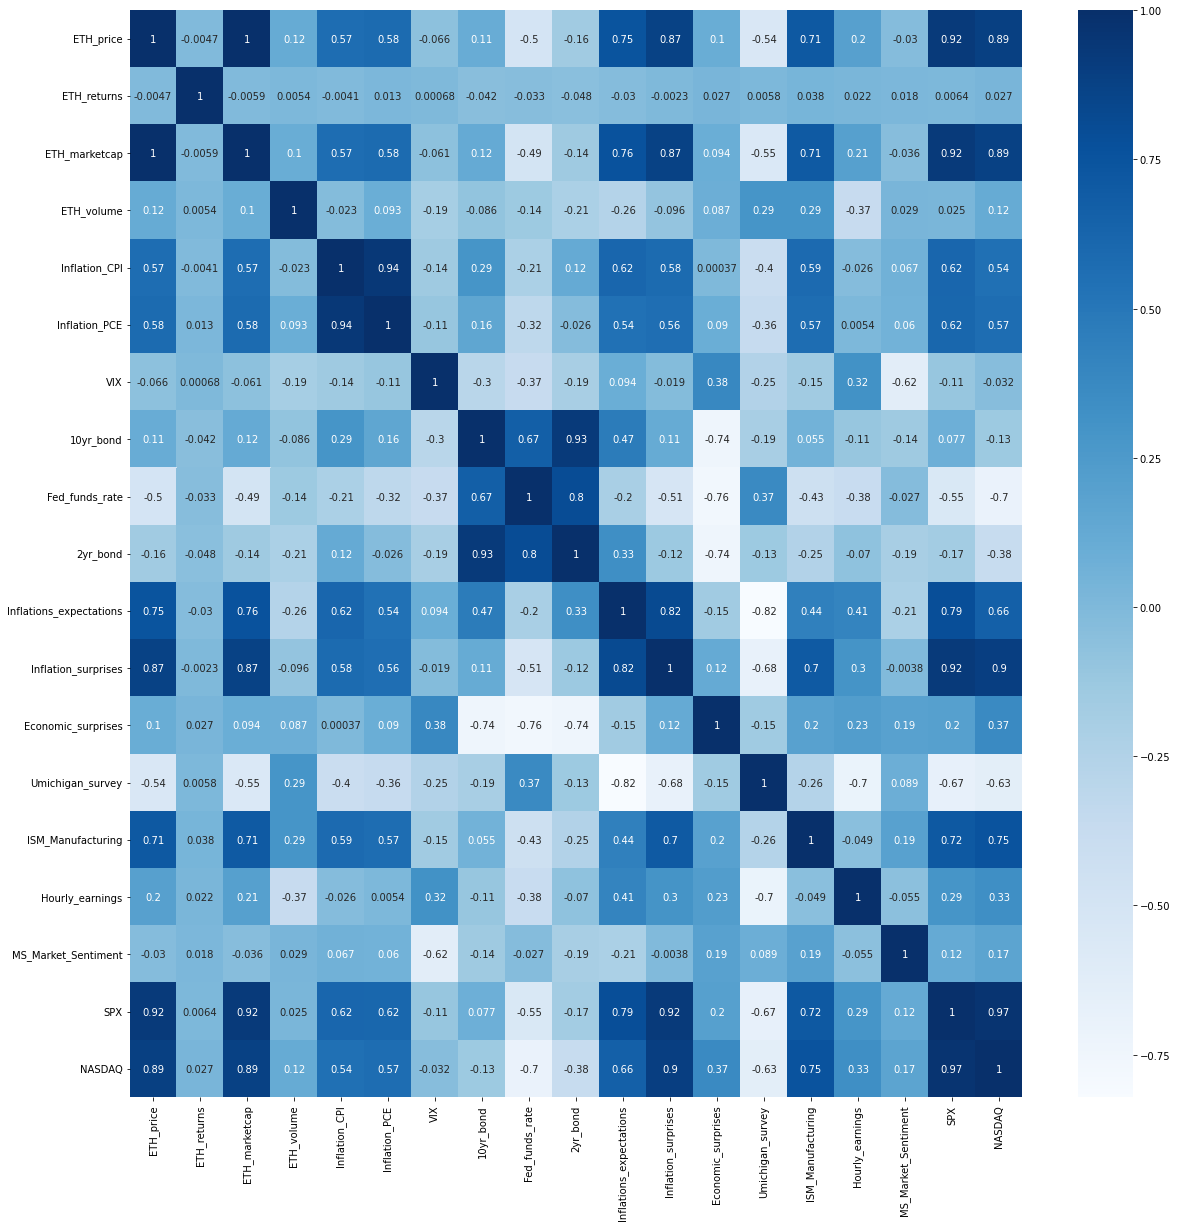

In [ ]:
corr2 = fin_df.corr()
plt.figure(figsize = (20, 20))
sns.heatmap(corr2, cmap="Blues", annot=True) 

In [ ]:
eth_lr = eth.copy()

eth_lr

,Date,EHT_price,Volume,Inflation_CPI,Inflation_PCE,VIX,10yr_bond,Fed_funds_rate,2yr_bond,Inflations_expectations,Inflation_surprises,Economic_surprises,Umichigan_survey,ISM_Manufacturing,Hourly_earnings,MS_Market_Sentiment,SPX,NASDAQ
0,2020-01-01,130.802002,7935230330,0.2,0.2,13.78,1.92,1.75,1.57,2.53,-15.70,0.00,99.3,47.9,2.9,0.71,3230.78,8972.60
1,2020-02-01,127.410179,8032709256,0.2,0.2,18.84,1.51,1.75,1.31,2.50,-28.98,0.04,99.8,51.4,3.0,-0.33,3225.52,9150.94
2,2020-03-01,134.171707,10476845358,0.2,0.2,40.11,1.15,1.75,0.91,2.50,-28.98,0.38,99.8,51.4,3.0,-1.67,2954.22,8567.37
3,2020-04-01,135.069366,7430904515,-0.3,-0.2,57.06,0.58,0.25,0.21,2.54,-26.41,0.39,89.1,49.1,3.6,-1.85,2470.50,7360.58
4,2020-05-01,136.276779,7526675353,-0.8,-0.5,37.19,0.61,0.25,0.19,2.62,-15.18,0.29,71.8,41.6,8.0,-1.06,2830.71,8604.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
987,2022-05-11,1627.968018,11006973190,0.3,0.2,32.56,2.92,1.00,2.64,6.35,47.30,0.16,65.2,55.4,5.5,-1.06,3935.18,11364.24
988,2022-06-11,1572.234741,11632744705,1.0,0.6,27.75,3.16,1.00,3.06,6.58,42.97,-0.20,58.4,56.1,5.3,-0.46,3900.86,11340.02
989,2022-07-11,1568.591309,15279963349,1.3,1.0,26.17,2.99,1.75,3.07,6.78,47.70,-0.20,50.0,53.0,5.2,-0.85,3854.43,11372.60
990,2022-08-11,1332.835571,42048003440,0.0,-0.1,20.20,2.89,2.50,3.22,6.22,54.15,-0.11,51.5,52.8,5.2,0.47,4207.27,12779.91
